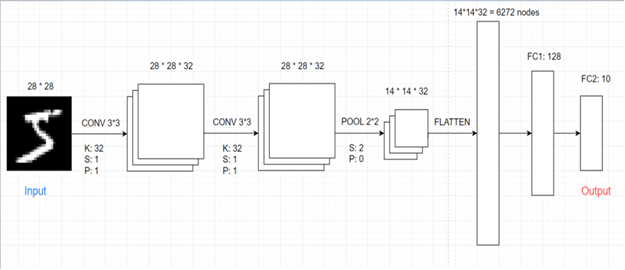

In [1]:
# 1. Thêm thư viện 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# 2. Load dữ liệu mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(len(X_train))
print(len(X_test))
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

60000
10000
(50000, 28, 28)


In [3]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(50000, 28, 28, 1)


In [4]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu: ', y_train[0])
print('Dữ liệu y sau one-hot encoding: ', Y_train[0])

Dữ liệu y ban đầu:  5
Dữ liệu y sau one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# Dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác suất
model.add(Dense(10, activation='softmax'))

In [6]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng,
#  phương thức dùng để tối ưu hàm loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 7. Thực hiện trên model với data
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
model.save('model1.h5')

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2873 - accuracy: 0.9228 - val_loss: 0.0743 - val_accuracy: 0.9805
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.0273 - accuracy: 0.9921 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0402 -

Dữ liệu:  7554
1/1 [==============================] - 0s 72ms/step
Giá trị dự đoán:  3


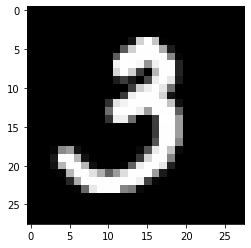

In [8]:
# 8. Dự đoán ảnh
import random 
import matplotlib.pyplot as plt
rd = random.randrange(9999)
print('Dữ liệu: ',rd)
plt.imshow(X_test[rd].reshape(28, 28), cmap='gray')
y_predict = model.predict(X_test[rd].reshape(1, 28, 28, 1))
print('Giá trị dự đoán: ', np.argmax(y_predict))